# 컬러 이미지 다중 분류
- cifar-10 데이터셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
!nvidia-smi

Thu Jan  5 01:07:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 데이터 준비

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
y_train = y_train.reshape(-1)
y_test = y_test.flatten()

y_train.shape, y_test.shape

((50000,), (10000,))

In [5]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
samples = np.random.randint(len(X_train), size=9)
samples

array([  230,  3138, 19340,  8943,  2707,  4643, 49758, 43666, 33469])

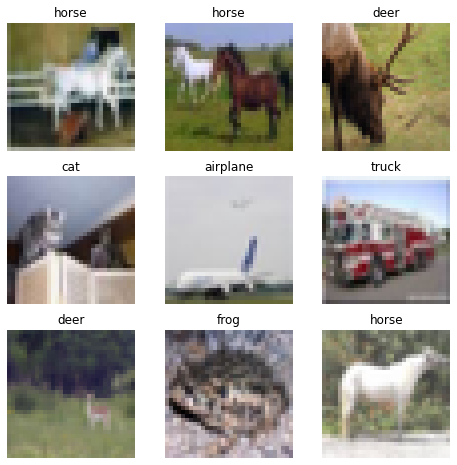

In [7]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx], cmap='gray')                          
  plt.axis('off')
  plt.title(class_name[y_train[idx]])
plt.show()

# 검증 데이터

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(35000, 32, 32, 3) (15000, 32, 32, 3)
(35000,) (15000,)


In [9]:
# 정규화

X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [10]:
# 레이블 원핫 인코딩 (다중분류)

from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [11]:
y_train_oh[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# 모델 만들기

In [12]:
X_train.shape

(35000, 32, 32, 3)

In [13]:
y_train_oh.shape

(35000, 10)

In [14]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(32, 32, 3)),                                                 
    layers.MaxPooling2D(2),
    
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),  

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(), 
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')                                            
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [16]:
%%time

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose=1)

Epoch 1/30
1094/1094 [==============================] - 15s 6ms/step - loss: 1.6300 - acc: 0.4011 - val_loss: 1.3532 - val_acc: 0.5065
Epoch 2/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2644 - acc: 0.5507 - val_loss: 1.1885 - val_acc: 0.5797
Epoch 3/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.1010 - acc: 0.6128 - val_loss: 1.0822 - val_acc: 0.6205
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9891 - acc: 0.6510 - val_loss: 1.0377 - val_acc: 0.6396
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9113 - acc: 0.6822 - val_loss: 0.9900 - val_acc: 0.6567
Epoch 6/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.8431 - acc: 0.7052 - val_loss: 1.0518 - val_acc: 0.6419
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7814 - acc: 0.7285 - val_loss: 0.9993 - val_acc: 0.6613
Epoch 8/30
1094/1094 [==============================] - 6s 5m

In [17]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

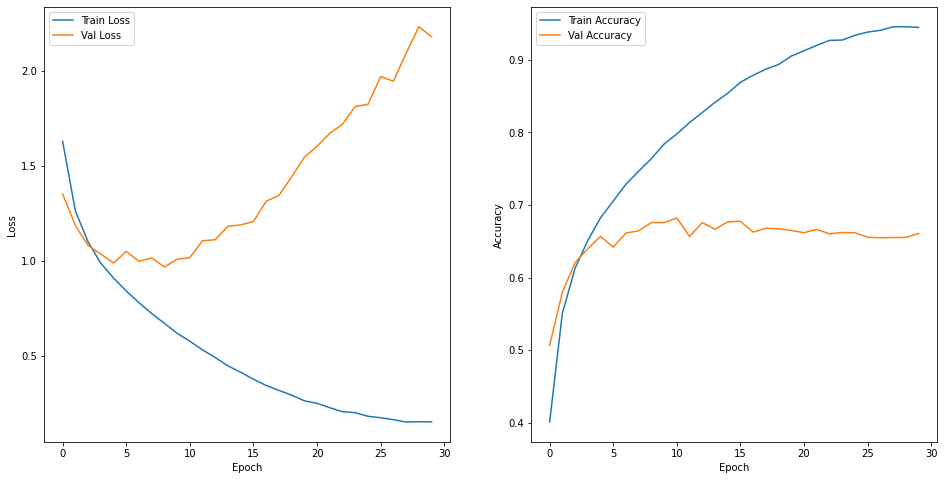

In [18]:
plot_history(log)

# Drop Out(드롭아웃)

In [20]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(32, 32, 3)),                                                 
    layers.MaxPooling2D(2),
    layers.Dropout(0.3), 
    
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),  
    layers.Dropout(0.3), 
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3), 

    layers.Flatten(),
    layers.Dropout(0.3), 

    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')                                            
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose=1)

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.8228 - acc: 0.3183 - val_loss: 1.5051 - val_acc: 0.4621
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.4920 - acc: 0.4549 - val_loss: 1.3094 - val_acc: 0.5441
Epoch 3/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.3667 - acc: 0.5065 - val_loss: 1.2146 - val_acc: 0.5623
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.2990 - acc: 0.5366 - val_loss: 1.1899 - val_acc: 0.5814
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2498 - acc: 0.5553 - val_loss: 1.1142 - val_acc: 0.6106
Epoch 6/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2161 - acc: 0.5673 - val_loss: 1.1136 - val_acc: 0.6048
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1873 - acc: 0.5782 - val_loss: 1.0686 - val_acc: 0.6221
Epoch 8/30
1094/1094 [==============================] - 6s 6ms

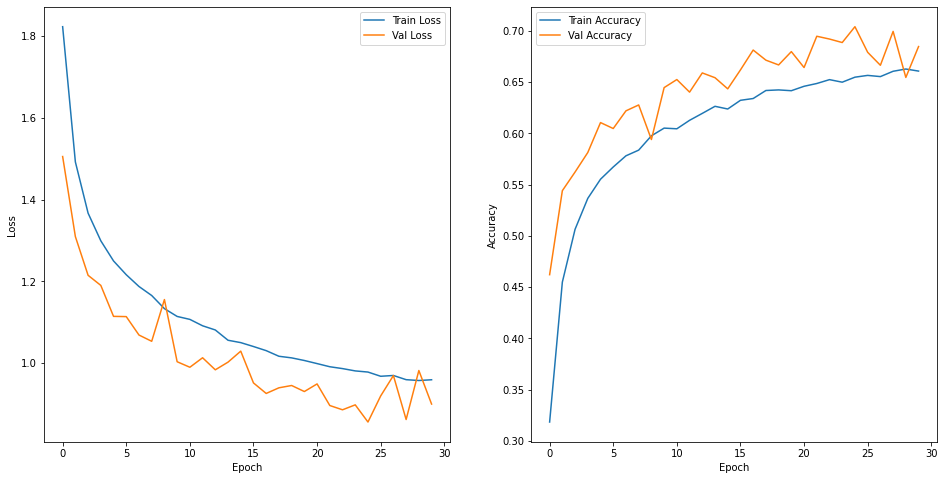

In [21]:
plot_history(log)

In [22]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 5ms/step - loss: 0.9041 - acc: 0.6869


[0.9041386842727661, 0.6869000196456909]

# Batch Nomalization (배치정규화)

In [36]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),                                                                  #Relu 분리
    layers.MaxPooling2D(2),
    
    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2), 
    
    layers.Conv2D(128, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dropout(0.5), 
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax'),                                            
    ])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose=1)

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.6048 - acc: 0.4145 - val_loss: 1.8930 - val_acc: 0.3861
Epoch 2/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2452 - acc: 0.5538 - val_loss: 1.1841 - val_acc: 0.5819
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1246 - acc: 0.6021 - val_loss: 1.1700 - val_acc: 0.5729
Epoch 4/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0429 - acc: 0.6305 - val_loss: 1.0684 - val_acc: 0.6187
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9811 - acc: 0.6542 - val_loss: 1.2329 - val_acc: 0.5927
Epoch 6/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9259 - acc: 0.6735 - val_loss: 0.8881 - val_acc: 0.6868
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.8834 - acc: 0.6910 - val_loss: 1.0146 - val_acc: 0.6333
Epoch 8/30
1094/1094 [==============================] - 6s 6ms

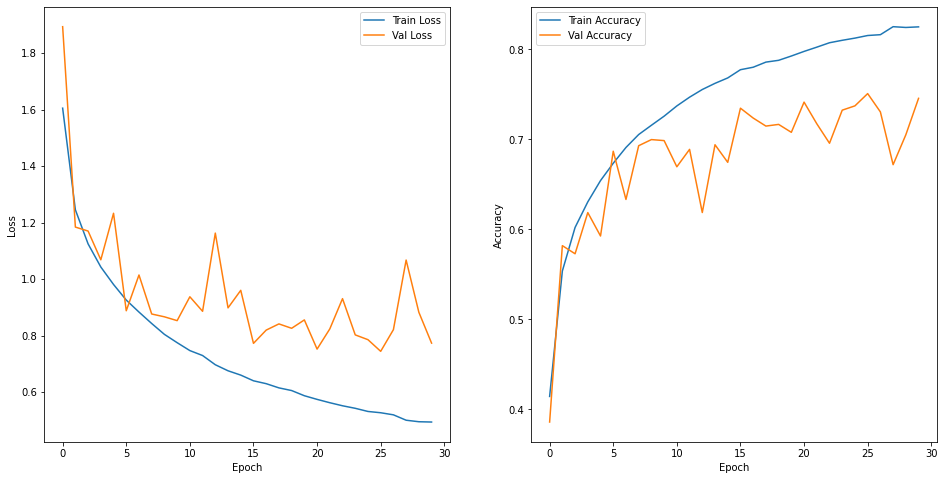

In [37]:
plot_history(log)

In [38]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.7694 - acc: 0.7462


[0.7693727612495422, 0.7462000250816345]

# adam - > rmsprop

In [39]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),                                                                  #Relu 분리
    layers.MaxPooling2D(2),
    
    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2), 
    
    layers.Conv2D(128, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(), 
    layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax'),                                            
    ])

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose=1)

Epoch 1/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.5892 - acc: 0.4215 - val_loss: 1.3736 - val_acc: 0.5180
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.2569 - acc: 0.5517 - val_loss: 1.2696 - val_acc: 0.5483
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1409 - acc: 0.5973 - val_loss: 1.0652 - val_acc: 0.6209
Epoch 4/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.0598 - acc: 0.6252 - val_loss: 1.1739 - val_acc: 0.5838
Epoch 5/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9970 - acc: 0.6475 - val_loss: 1.0655 - val_acc: 0.6281
Epoch 6/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9384 - acc: 0.6713 - val_loss: 1.0672 - val_acc: 0.6297
Epoch 7/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.8998 - acc: 0.6849 - val_loss: 0.9315 - val_acc: 0.6765
Epoch 8/30
1094/1094 [==============================] - 7s 7ms

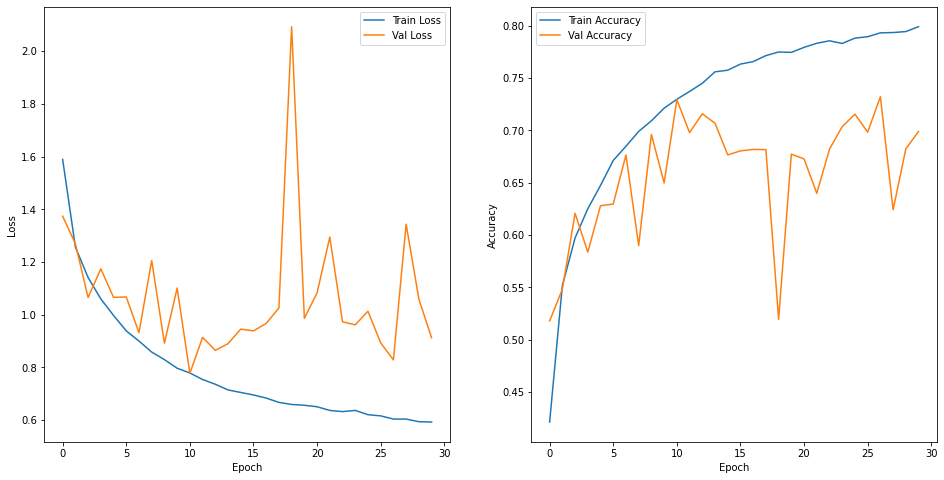

In [40]:
plot_history(log)

In [41]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.9176 - acc: 0.6981


[0.9175829291343689, 0.6980999708175659]

# Callback(콜백)
- Model Checkpoint

In [31]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),                                                                  #Relu 분리
    layers.MaxPooling2D(2),
    
    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2), 
    
    layers.Conv2D(128, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax'),                                            
    ])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)


In [34]:
from tensorflow.keras import callbacks

ckpt_path = 'cifar10.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor = 'val_loss',
    save_weights_only = True,
    save_best_only = True,
    verbose =1
)

In [42]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                callbacks=[ckpt_callback],
                verbose=1)

Epoch 1/30
1091/1094 [============================>.] - ETA: 0s - loss: 0.5897 - acc: 0.8005
Epoch 1: val_loss did not improve from 0.73227
1094/1094 [==============================] - 7s 7ms/step - loss: 0.5896 - acc: 0.8005 - val_loss: 0.9823 - val_acc: 0.7215
Epoch 2/30
1087/1094 [============================>.] - ETA: 0s - loss: 0.5815 - acc: 0.8024
Epoch 2: val_loss did not improve from 0.73227
1094/1094 [==============================] - 7s 7ms/step - loss: 0.5829 - acc: 0.8022 - val_loss: 0.8688 - val_acc: 0.7204
Epoch 3/30
1091/1094 [============================>.] - ETA: 0s - loss: 0.5776 - acc: 0.8041
Epoch 3: val_loss did not improve from 0.73227
1094/1094 [==============================] - 7s 7ms/step - loss: 0.5775 - acc: 0.8040 - val_loss: 1.0924 - val_acc: 0.7070
Epoch 4/30
1090/1094 [============================>.] - ETA: 0s - loss: 0.5700 - acc: 0.8069
Epoch 4: val_loss did not improve from 0.73227
1094/1094 [==============================] - 7s 7ms/step - loss: 0.5698

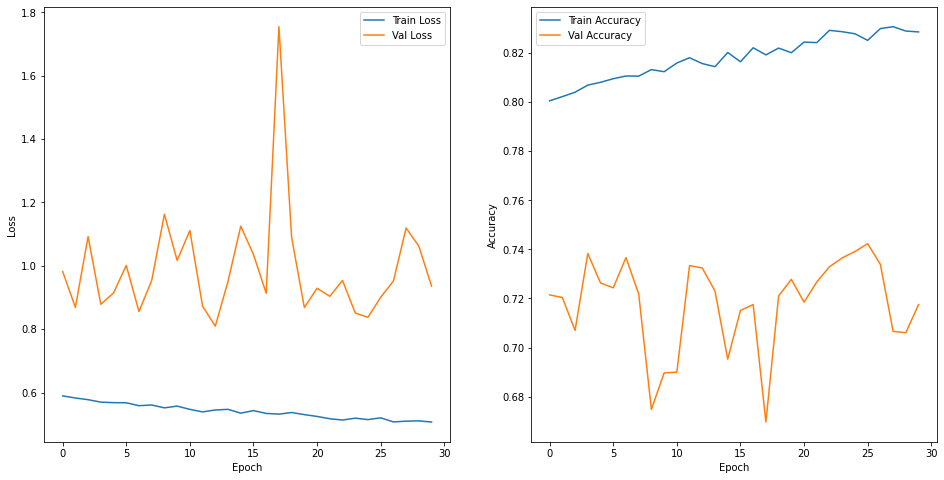

In [43]:
plot_history(log)

In [44]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 2s 5ms/step - loss: 0.9236 - acc: 0.7161


[0.9236453175544739, 0.7160999774932861]

In [45]:
model.load_weights(ckpt_path)

In [46]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.7417 - acc: 0.7506


[0.7417319416999817, 0.7505999803543091]

# Early Stopping

In [48]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),                                                                  #Relu 분리
    layers.MaxPooling2D(2),
    
    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2), 
    
    layers.Conv2D(128, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax'),                                            
    ])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [49]:
from tensorflow.keras import callbacks
es_callback = callbacks.EarlyStopping(
                        monitor = 'val_loss',
                        patience = 5,
)

In [50]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                callbacks=[ckpt_callback, es_callback],
                verbose=1)

Epoch 1/30
1084/1094 [============================>.] - ETA: 0s - loss: 1.5953 - acc: 0.4215
Epoch 1: val_loss did not improve from 0.73227
1094/1094 [==============================] - 8s 6ms/step - loss: 1.5933 - acc: 0.4223 - val_loss: 1.4004 - val_acc: 0.4843
Epoch 2/30
1086/1094 [============================>.] - ETA: 0s - loss: 1.2652 - acc: 0.5489
Epoch 2: val_loss did not improve from 0.73227
1094/1094 [==============================] - 8s 7ms/step - loss: 1.2646 - acc: 0.5493 - val_loss: 1.4123 - val_acc: 0.5109
Epoch 3/30
1084/1094 [============================>.] - ETA: 0s - loss: 1.1374 - acc: 0.5951
Epoch 3: val_loss did not improve from 0.73227
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1367 - acc: 0.5955 - val_loss: 1.1886 - val_acc: 0.5833
Epoch 4/30
1083/1094 [============================>.] - ETA: 0s - loss: 1.0497 - acc: 0.6301
Epoch 4: val_loss did not improve from 0.73227
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0496

In [51]:
model.load_weights(ckpt_path)

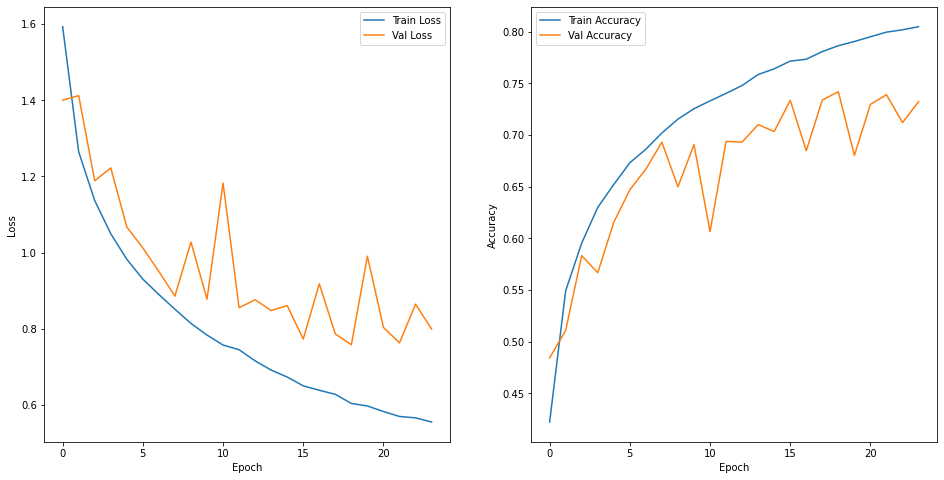

In [52]:
plot_history(log)